Preprocessing

In [2]:
import pandas as pd

data = pd.read_csv('lung cancer data.csv')

data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

(  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 0      M   69        1               2        2              1   
 1      M   74        2               1        1              1   
 2      F   59        1               1        1              2   
 3      M   63        2               2        2              1   
 4      F   63        1               2        1              1   
 
    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
 0                1         2         1         2                  2         2   
 1                2         2         2         1                  1         1   
 2                1         2         1         2                  1         2   
 3                1         1         1         1                  2         1   
 4                1         1         1         2                  1         2   
 
    SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
 0                    2      

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # Change 'M' and 'F' as 0 and 1
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # Change 'NO' and 'YES' as 0 and 1

# Drop the target variable as it's not used in clustering
data_clustering = data.drop(columns=['LUNG_CANCER'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clustering)
scaled_data_df = pd.DataFrame(scaled_data, columns=data_clustering.columns)
scaled_data_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480


Elbow plot to determine the amount of clusters

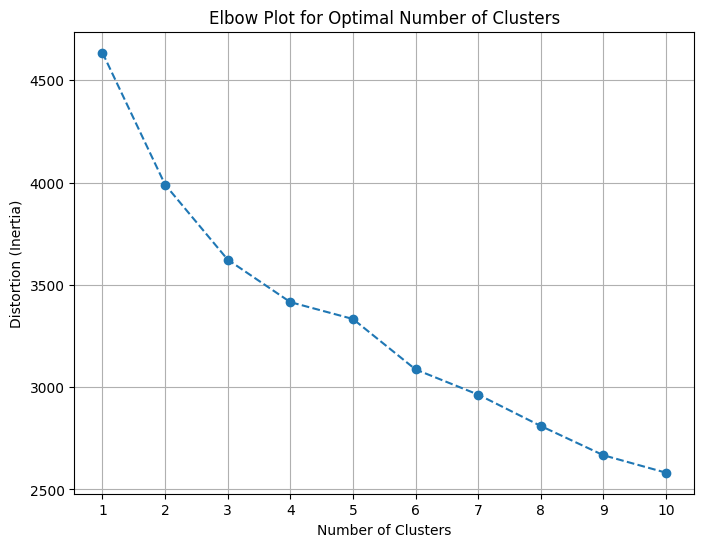

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, distortions, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

KMeans Clustering

In [5]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data_clustering = pd.DataFrame(scaled_data, columns=data_clustering.columns)
data_clustering['Cluster'] = clusters

# Display the first few rows
print(data_clustering.head())

     GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.952579  0.771850 -1.135292        0.869300  1.003241      -1.003241   
1  0.952579  1.381829  0.880830       -1.150351 -0.996769      -1.003241   
2 -1.049781 -0.448107 -1.135292       -1.150351 -0.996769       0.996769   
3  0.952579  0.039876  0.880830        0.869300  1.003241      -1.003241   
4 -1.049781  0.039876 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAI

Summary

In [ ]:
print(data_clustering.groupby('Cluster').mean())

           GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
Cluster                                                           
0        0.651339  0.077662 -0.064785       -0.542669 -0.607386   
1       -0.730256 -0.165181  0.344627        0.246216  0.216003   
2       -0.048601  0.066188 -0.245827        0.374287  0.473827   

         PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
Cluster                                                                 
0            -0.578461        -0.266358  0.168576  0.375876  0.358062   
1             0.188254        -0.030987  0.265918 -0.585119 -0.649363   
2             0.467354         0.323640 -0.431818  0.122816  0.201755   

         ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  \
Cluster                                                     
0                 0.554014  0.708800             0.490502   
1                -1.056236 -0.397650             0.349611   
2                 0.359634 -0.418777            -0.865